In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df.head()

,Unnamed: 0,stars,text
0,0,1.0,Total bill for this horrible service? Over $8G...
1,1,5.0,I *adore* Travis at the Hard Rock's new Kelly ...
2,2,5.0,I have to say that this office really has it t...
3,3,5.0,Went in for a lunch. Steak sandwich was delici...
4,4,1.0,Today was my second out of three sessions I ha...


In [4]:
df = df.drop(labels='Unnamed: 0', axis=1)

In [5]:
df

,stars,text
0,1.0,Total bill for this horrible service? Over $8G...
1,5.0,I *adore* Travis at the Hard Rock's new Kelly ...
2,5.0,I have to say that this office really has it t...
3,5.0,Went in for a lunch. Steak sandwich was delici...
4,1.0,Today was my second out of three sessions I ha...
...,...,...
149995,5.0,"The place nice, and Frieda is fabulously amazi..."
149996,4.0,I chose Rincon because of the excellent review...
149997,1.0,"We have enjoyed the Farm before, but this was ..."
149998,3.0,Came here with a couple of friends earlier thi...


In [6]:
df['review_length'] = df.text.map(len)

In [7]:
df

,stars,text,review_length
0,1.0,Total bill for this horrible service? Over $8G...,204
1,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,1561
2,5.0,I have to say that this office really has it t...,615
3,5.0,Went in for a lunch. Steak sandwich was delici...,407
4,1.0,Today was my second out of three sessions I ha...,3509
...,...,...,...
149995,5.0,"The place nice, and Frieda is fabulously amazi...",852
149996,4.0,I chose Rincon because of the excellent review...,1863
149997,1.0,"We have enjoyed the Farm before, but this was ...",357
149998,3.0,Came here with a couple of friends earlier thi...,420


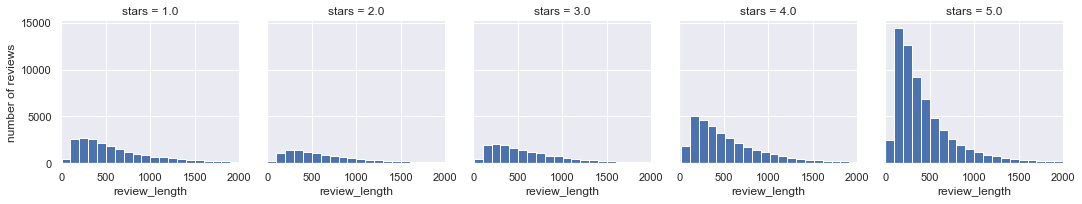

In [8]:
ax = sns.FacetGrid(data=df, col='stars', xlim=(0, 2000)).map(plt.hist, 'review_length', bins=50)
ax.axes[0][0].set(ylabel='number of reviews');

Text(0.5, 1.0, 'Number of Reviews by Rating')

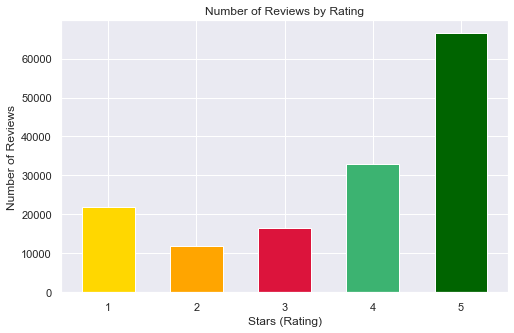

In [9]:
star_x = df.stars.value_counts().index
star_y = df.stars.value_counts().values

plt.figure(figsize=(8,5))
# colors are in the order 5, 4, 3, 1, 2
bar_colors = ['darkgreen', 'mediumseagreen', 'gold', 'crimson', 'orange']
plt.bar(star_x, star_y, color=bar_colors, width=.6)
plt.xlabel('Stars (Rating)')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Rating')

In [10]:
pos_reviews = df.text[df.stars>3].values
neg_reviews = df.text[df.stars<3].values
print('Postive Reviews:  {:,}'.format(len(pos_reviews)))
print('Negative Reviews:  {:,}'.format(len(neg_reviews)))

Postive Reviews:  99,454
Negative Reviews:  33,966


In [11]:
from sklearn.feature_extraction import text 
extra_words = ['ve', 'like', 'got', 'Cleveland', 'just', 
               'don', 'really', 'said', 'told', 'ok',
               'came', 'went', 'did', 'didn', 'good']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_words)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a vectorizer object to generate term document counts
tfidf_pos = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

tfidf_neg = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

In [13]:
np.random.seed(38)
num_reviews = 20000
random_neg = np.random.choice(neg_reviews, size=num_reviews)
random_pos = np.random.choice(pos_reviews, size=num_reviews)

dicty = {'pizzas':'pizza', 'burgers':'burger', 'ordered':'order',
         'prices':'price', 'topping':'toppings'}
def replace_words(text, dicty):
    '''Returns text with word substitutions made according
       to the passed `dicty` dictionary'''
    for i,j in dicty.items():
        text = text.replace(i,j)
    return text

random_neg = [replace_words(w, dicty) for w in random_neg]
random_pos = [replace_words(w, dicty) for w in random_pos]

# Get the vectors
neg_vectors = tfidf_neg.fit_transform(random_neg)
pos_vectors = tfidf_pos.fit_transform(random_pos)

c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cleveland'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [14]:
# Store TFIDF vectors in a Pandas DataFrame to investigate further
neg_df = pd.DataFrame(neg_vectors.todense(), columns=[tfidf_neg.get_feature_names()])
pos_df = pd.DataFrame(pos_vectors.todense(), columns=[tfidf_pos.get_feature_names()])

# get mean for each column (word): highest means are most important words
col_means_neg = {}
for col in neg_df:
    col_means_neg[col] = neg_df[col].mean()

col_means_pos = {}
for col in pos_df:
    col_means_pos[col] = pos_df[col].mean()

In [15]:
no_top_words = 8

print('Top %d words in POSITIVE reviews:' %no_top_words, end='')
print(sorted(col_means_pos, key=col_means_pos.get, reverse=True)[:no_top_words])

print('Top %d words in NEGATIVE reviews:' %no_top_words, end='')
print(sorted(col_means_neg, key=col_means_neg.get, reverse=True)[:no_top_words])

Top 8 words in POSITIVE reviews:[('great',), ('food',), ('place',), ('service',), ('time',), ('best',), ('love',), ('amazing',)]
Top 8 words in NEGATIVE reviews:[('food',), ('service',), ('place',), ('order',), ('time',), ('minutes',), ('customer',), ('people',)]


# LSA- Latent Semantic Analysis

In [16]:
from gensim import corpora, models, similarities, matutils

# Convert sparse matrix of counts to a gensim corpus
# Need to transpose it for gensim which wants terms by docs instead of docs by terms
tfidf_pos_corpus = matutils.Sparse2Corpus(pos_vectors.transpose())
tfidf_neg_corpus = matutils.Sparse2Corpus(neg_vectors.transpose())

# Row indices
id2word_pos = dict((v,k) for k,v in tfidf_pos.vocabulary_.items())
id2word_neg = dict((v,k) for k,v in tfidf_neg.vocabulary_.items())

id2word_pos = corpora.Dictionary.from_corpus(tfidf_pos_corpus, id2word=id2word_pos)
id2word_neg = corpora.Dictionary.from_corpus(tfidf_neg_corpus, id2word=id2word_neg)

In [17]:
num_topics = 20
lsi_pos = models.LsiModel(tfidf_pos_corpus, id2word=id2word_pos, num_topics=num_topics)
lsi_neg = models.LsiModel(tfidf_neg_corpus, id2word=id2word_neg, num_topics=num_topics)

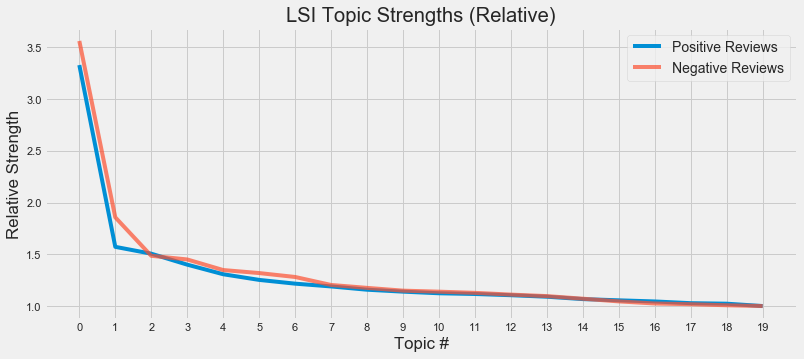

In [18]:
singular_values_pos = lsi_pos.projection.s.tolist()
singular_values_pos_rel = [sv/singular_values_pos[-1] for sv in singular_values_pos]
singular_values_neg = lsi_neg.projection.s.tolist()
singular_values_neg_rel = [sv/singular_values_neg[-1] for sv in singular_values_neg]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
plt.plot(range(len(singular_values_pos)), singular_values_pos_rel, label='Positive Reviews', alpha=1.0)
plt.plot(range(len(singular_values_neg)), singular_values_neg_rel, label='Negative Reviews', alpha=0.7)
plt.xticks(range(len(singular_values_pos)), range(len(singular_values_pos)))
plt.xlabel('Topic #')
plt.ylabel('Relative Strength')
plt.title('LSI Topic Strengths (Relative)')
plt.legend(loc=0, fontsize='medium');

In [19]:
topics_to_print = 5

In [20]:
from pprint import pprint
print('Top %d topics for POSITIVE reviews' %(topics_to_print))
print('-'*33)
pprint(lsi_pos.show_topics()[0:topics_to_print])

Top 5 topics for POSITIVE reviews
---------------------------------
[(0,
  '0.291*"great" + 0.276*"food" + 0.244*"place" + 0.194*"service" + '
  '0.146*"time" + 0.132*"love" + 0.132*"best" + 0.130*"amazing" + '
  '0.128*"friendly" + 0.120*"order"'),
 (1,
  '0.278*"chicken" + -0.263*"great" + 0.199*"order" + -0.178*"staff" + '
  '0.171*"delicious" + 0.170*"food" + 0.147*"pizza" + -0.143*"friendly" + '
  '-0.134*"job" + -0.119*"recommend"'),
 (2,
  '-0.480*"great" + -0.467*"food" + -0.280*"service" + 0.202*"pizza" + '
  '0.130*"time" + 0.103*"order" + -0.094*"atmosphere" + 0.083*"make" + '
  '0.083*"hair" + 0.081*"work"'),
 (3,
  '-0.891*"pizza" + -0.184*"great" + -0.111*"crust" + -0.101*"best" + '
  '0.075*"chicken" + -0.062*"wings" + -0.058*"toppingss" + -0.057*"service" + '
  '-0.057*"delivery" + -0.056*"cheese"'),
 (4,
  '0.547*"place" + 0.484*"love" + -0.254*"service" + -0.182*"great" + '
  '0.167*"staff" + 0.157*"friendly" + -0.131*"time" + -0.112*"order" + '
  '-0.099*"excellent" 

In [21]:
# look at top negative topics
print('Top %d topics for NEGATIVE reviews' %(topics_to_print))
print('-'*33)
pprint(lsi_neg.show_topics()[0:topics_to_print])

Top 5 topics for NEGATIVE reviews
---------------------------------
[(0,
  '0.271*"food" + 0.212*"order" + 0.202*"service" + 0.185*"place" + '
  '0.171*"time" + 0.124*"minutes" + 0.102*"asked" + 0.098*"customer" + '
  '0.097*"people" + 0.095*"bad"'),
 (1,
  '0.388*"food" + -0.236*"car" + 0.200*"chicken" + 0.167*"order" + '
  '-0.157*"customer" + -0.145*"called" + -0.132*"company" + '
  '-0.115*"appointment" + 0.109*"restaurant" + -0.104*"phone"'),
 (2,
  '0.307*"minutes" + 0.267*"service" + 0.246*"order" + -0.210*"chicken" + '
  '0.182*"food" + 0.169*"waited" + -0.164*"car" + -0.153*"place" + '
  '0.150*"wait" + 0.141*"table"'),
 (3,
  '-0.468*"order" + 0.391*"food" + -0.365*"pizza" + 0.297*"service" + '
  '-0.165*"chicken" + -0.164*"minutes" + 0.144*"place" + 0.118*"customer" + '
  '0.114*"horrible" + 0.113*"bad"'),
 (4,
  '0.726*"pizza" + 0.330*"service" + 0.253*"customer" + -0.146*"car" + '
  '0.135*"horrible" + -0.116*"minutes" + 0.101*"rude" + 0.094*"worst" + '
  '0.091*"terrible"

# NMF-NON negative matrix factorisation

In [22]:
from sklearn.decomposition import NMF

# change num_topics
num_topics = 6

nmf_pos = NMF(n_components=num_topics)
W_pos = nmf_pos.fit_transform(pos_vectors)
H_pos = nmf_pos.components_

nmf_neg = NMF(n_components=num_topics)
W_neg = nmf_neg.fit_transform(neg_vectors)
H_neg = nmf_neg.components_

In [23]:
def display_topics(model, feature_names, num_topics, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx < num_topics:
            print("{:11}".format("Topic %d:" %(topic_idx)), end='')
            print(", ".join(['{:04.3f}*'.format(topic[i])+feature_names[i] \
                             for i in topic.argsort()[:-no_top_words-1:-1]]))

no_topics = num_topics
no_top_words = 6

print('Top topics + words for POSITIVE reviews')
print('-'*39)
display_topics(nmf_pos, tfidf_pos.get_feature_names(), no_topics, no_top_words)

print('\nTop topics + words for NEGATIVE reviews')
print('-'*39)
display_topics(nmf_neg, tfidf_neg.get_feature_names(), no_topics, no_top_words)

Top topics + words for POSITIVE reviews
---------------------------------------
Topic 0:   1.159*chicken, 1.108*order, 0.859*delicious, 0.701*food, 0.589*fresh, 0.587*menu
Topic 1:   0.728*time, 0.461*work, 0.433*staff, 0.370*new, 0.363*job, 0.356*hair
Topic 2:   2.254*great, 1.541*food, 1.236*service, 0.373*atmosphere, 0.357*friendly, 0.347*excellent
Topic 3:   2.843*pizza, 0.364*crust, 0.255*cheese, 0.193*toppingss, 0.187*wings, 0.183*order
Topic 4:   2.241*place, 1.457*love, 0.419*friendly, 0.364*nice, 0.341*staff, 0.304*favorite
Topic 5:   1.889*amazing, 1.819*best, 0.593*vegas, 0.306*service, 0.292*recommend, 0.271*town

Top topics + words for NEGATIVE reviews
---------------------------------------
Topic 0:   3.030*food, 1.206*service, 0.815*place, 0.528*bad, 0.505*restaurant, 0.446*better
Topic 1:   0.640*customer, 0.627*time, 0.533*service, 0.488*called, 0.471*place, 0.449*rude
Topic 2:   1.602*order, 1.186*minutes, 0.602*table, 0.593*wait, 0.583*waited, 0.521*took
Topic 3:   1

In [24]:
# look at a random positive review
review_num = np.random.randint(0, high=len(random_pos))
print(review_num)
print(random_pos[review_num])

6774
This place is all around fantastic, beautiful set up. Great for brunch and big parties or just sitting at the bar watching the game. The bartenders are super friendly and fun to talk to. The food is delicious, the avocado toast and burger are amazing. The soap is what's up too!


In [25]:
# compute cosine similarities of this review with all other reviews in the new space
import sklearn.metrics.pairwise as smp

cosines = {}
for ind, review in enumerate(W_pos):
    similarity = smp.cosine_similarity(W_pos[review_num].reshape(1,-1), review.reshape(1,-1))
    cosines[ind] = similarity[0][0]

In [26]:
# get top 3 matching reviews
for n in sorted(cosines, key=cosines.get, reverse=True)[1:4]:
    print('-'*50)
    print('>> Similarity {:.3f}'.format(cosines[n]))
    print(random_pos[n])
print('-'*50)

--------------------------------------------------
>> Similarity 0.998
Wow! Glad I found this place off the strip, was not disappointed. From the moment we walked in the staff was very nice and friendly. Service was great and our food came fast. I order the Monte Cristo with seasoned potatoes and it was amazing! 

Some meals come with toast or coffee cake options, go with the coffee cake ;)
--------------------------------------------------
>> Similarity 0.998
Wow! Glad I found this place off the strip, was not disappointed. From the moment we walked in the staff was very nice and friendly. Service was great and our food came fast. I order the Monte Cristo with seasoned potatoes and it was amazing! 

Some meals come with toast or coffee cake options, go with the coffee cake ;)
--------------------------------------------------
>> Similarity 0.995
Best date place in Scottsdale.  It's a very small and intimate little bar that also serves food (never eaten anything but I've heard great th

# Count Vectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a vectorizer object to generate term document counts
cv_pos = CountVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

cv_neg = CountVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

# Get random subset of reviews
np.random.seed(38)
num_reviews = 15000
cv_random_neg = np.random.choice(neg_reviews, size=num_reviews)
cv_random_pos = np.random.choice(pos_reviews, size=num_reviews)

# replace words from defined dictionary 'dicty'
cv_random_neg = [replace_words(w, dicty) for w in cv_random_neg]
cv_random_pos = [replace_words(w, dicty) for w in cv_random_pos]

# Get the cv vectors
cv_neg_vectors = cv_neg.fit_transform(cv_random_neg).transpose()
cv_pos_vectors = cv_pos.fit_transform(cv_random_pos).transpose()

c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cleveland'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [28]:
# Convert sparse matrix of counts to a gensim corpus
corpus_neg = matutils.Sparse2Corpus(cv_neg_vectors)
corpus_pos = matutils.Sparse2Corpus(cv_pos_vectors)

# save a mapping (dict) of row id to word (token) for later use by gensim 
id2word_cv_pos = dict((v, k) for k, v in cv_pos.vocabulary_.items())
id2word_cv_neg = dict((v, k) for k, v in cv_neg.vocabulary_.items())


# LDA -Latent Dirichlet Allocation

In [29]:
# create lda multicore model
lda_pos = models.ldamulticore.LdaMulticore(corpus=corpus_pos, num_topics=5, 
                                           id2word=id2word_cv_pos, passes=10, workers=15)
lda_neg = models.ldamulticore.LdaMulticore(corpus=corpus_neg, num_topics=5, 
                                           id2word=id2word_cv_neg, passes=10, workers=15)

In [30]:
print('Top topics + words for POSITIVE reviews')
print('-'*40)
pprint(lda_pos.print_topics(num_words=7))

print('\nTop topics + words for NEGATIVE reviews')
print('-'*40)
pprint(lda_neg.print_topics(num_words=7))

Top topics + words for POSITIVE reviews
----------------------------------------
[(0,
  '0.025*"place" + 0.020*"great" + 0.016*"food" + 0.010*"time" + 0.010*"love" '
  '+ 0.008*"nice" + 0.007*"amazing"'),
 (1,
  '0.021*"food" + 0.013*"great" + 0.011*"service" + 0.010*"place" + '
  '0.010*"order" + 0.008*"chicken" + 0.008*"delicious"'),
 (2,
  '0.011*"great" + 0.009*"place" + 0.008*"room" + 0.008*"hotel" + 0.007*"best" '
  '+ 0.007*"food" + 0.006*"hair"'),
 (3,
  '0.016*"great" + 0.011*"time" + 0.010*"service" + 0.007*"place" + '
  '0.006*"recommend" + 0.006*"work" + 0.006*"staff"'),
 (4,
  '0.012*"place" + 0.012*"great" + 0.011*"food" + 0.011*"pizza" + '
  '0.009*"burger" + 0.007*"friendly" + 0.007*"service"')]

Top topics + words for NEGATIVE reviews
----------------------------------------
[(0,
  '0.024*"food" + 0.021*"order" + 0.013*"place" + 0.010*"service" + '
  '0.009*"time" + 0.007*"minutes" + 0.006*"chicken"'),
 (1,
  '0.012*"time" + 0.008*"place" + 0.007*"appointment" + 0.007*

# Continuing with NMF Topics

In [31]:
# let's remind ourselves of the POSITIVE topics
print('Top topics + words for POSITIVE reviews')
print('-'*39)
display_topics(nmf_pos, tfidf_pos.get_feature_names(), no_topics, no_top_words)

Top topics + words for POSITIVE reviews
---------------------------------------
Topic 0:   1.159*chicken, 1.108*order, 0.859*delicious, 0.701*food, 0.589*fresh, 0.587*menu
Topic 1:   0.728*time, 0.461*work, 0.433*staff, 0.370*new, 0.363*job, 0.356*hair
Topic 2:   2.254*great, 1.541*food, 1.236*service, 0.373*atmosphere, 0.357*friendly, 0.347*excellent
Topic 3:   2.843*pizza, 0.364*crust, 0.255*cheese, 0.193*toppingss, 0.187*wings, 0.183*order
Topic 4:   2.241*place, 1.457*love, 0.419*friendly, 0.364*nice, 0.341*staff, 0.304*favorite
Topic 5:   1.889*amazing, 1.819*best, 0.593*vegas, 0.306*service, 0.292*recommend, 0.271*town


In [32]:
# we can investigate a random positive review and see how it's distributed across those topics
review_num = np.random.randint(0, high=len(random_pos))
print('Positive Review #%d' %review_num)
print('-'*25)
print(random_pos[review_num])
print('-'*25)
topic_dict = {}
for ind, w in enumerate(W_pos[review_num]):
    topic_dict[ind] = w
for k in sorted(topic_dict, key=topic_dict.get, reverse=True):
     print('Topic {}: {:.4f}'.format(k, topic_dict[k]))

Positive Review #632
-------------------------
This was my first visit and I'm impressed! I've had tons and tons and tons of manicures and pedicures all over the world... and I have to say this was the best paint job so far. The cuticle clean-up was good too but I noticed some missed spots. I appreciated the foot massage, but the hand massage could have been longer :-) 

The place is clean and the lady who did my nails showed me how they sanitize the tools. I was a bit bummed that she didn't clean up her area after working on the previous customer. 

One more thing.... You know when you go into a nail salon and they start speaking a language you don't know and you wonder if they are talking about you? Well, that doesn't happen here! They started speaking Chinese and then stopped and apologized to me to reassure me they were talking about something (I can't even remember what). That's never happened ever! So I appreciated that gesture. 

The ladies were so friendly and personable with t

In [33]:
print('Top topics + words for NEGATIVE reviews')
print('-'*39)
display_topics(nmf_neg, tfidf_neg.get_feature_names(), no_topics, no_top_words)

Top topics + words for NEGATIVE reviews
---------------------------------------
Topic 0:   3.030*food, 1.206*service, 0.815*place, 0.528*bad, 0.505*restaurant, 0.446*better
Topic 1:   0.640*customer, 0.627*time, 0.533*service, 0.488*called, 0.471*place, 0.449*rude
Topic 2:   1.602*order, 1.186*minutes, 0.602*table, 0.593*wait, 0.583*waited, 0.521*took
Topic 3:   1.450*chicken, 0.620*sauce, 0.619*burger, 0.581*rice, 0.533*fries, 0.515*salad
Topic 4:   2.886*pizza, 0.348*crust, 0.229*order, 0.227*cheese, 0.203*pepperoni, 0.201*delivery
Topic 5:   2.686*car, 0.505*rental, 0.450*wash, 0.296*company, 0.269*oil, 0.255*cars


In [34]:
# now investigate a random negative review and see how it's distributed across those topics
review_num = np.random.randint(0, high=len(random_neg))
print('Negative Review #%d' %review_num)
print('-'*25)
print(random_neg[review_num])
print('-'*25)
topic_dict = {}
for ind, w in enumerate(W_neg[review_num]):
    topic_dict[ind] = w
for k in sorted(topic_dict, key=topic_dict.get, reverse=True):
     print('Topic {}: {:.4f}'.format(k, topic_dict[k]))

Negative Review #1416
-------------------------
I really don't know what all the hype is about. Burgers are less than mediocre,  almost tasteless. Would not recommend to anyone, save your money and spend it in something that actually tastes like what it costs.
-------------------------
Topic 1: 0.0157
Topic 3: 0.0095
Topic 0: 0.0080
Topic 5: 0.0009
Topic 4: 0.0001
Topic 2: 0.0000


In [35]:
print('Postive Reviews:  {:,}'.format(len(pos_reviews)))
print('Negative Reviews:  {:,}'.format(len(neg_reviews)))

Postive Reviews:  99,454
Negative Reviews:  33,966


In [36]:
# Create a vectorizer object to generate term document counts
tfidf_pos = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

tfidf_neg = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

# replace words with defined dictionary 'dicty'
pos_reviews = [replace_words(w, dicty) for w in pos_reviews]
neg_reviews = [replace_words(w, dicty) for w in neg_reviews]

# Get the vectors
neg_vectors = tfidf_neg.fit_transform(neg_reviews)
pos_vectors = tfidf_pos.fit_transform(pos_reviews)

In [46]:
# NMF for all reviews
from sklearn.decomposition import NMF

# change num_topics
num_topics = 5

nmf_pos = NMF(n_components=num_topics)
W_pos = nmf_pos.fit_transform(pos_vectors)
H_pos = nmf_pos.components_

nmf_neg = NMF(n_components=num_topics)
W_neg = nmf_neg.fit_transform(neg_vectors)
H_neg = nmf_neg.components_

In [47]:
no_topics = num_topics
no_top_words = 5

print('Topics for POSITIVE reviews')
print('-'*39)
display_topics(nmf_pos, tfidf_pos.get_feature_names(), no_topics, no_top_words)

print('\nTopics for NEGATIVE reviews')
print('-'*39)
display_topics(nmf_neg, tfidf_neg.get_feature_names(), no_topics, no_top_words)

Topics for POSITIVE reviews
---------------------------------------
Topic 0:   1.481*time, 1.001*staff, 0.845*work, 0.833*recommend, 0.824*friendly
Topic 1:   1.296*chicken, 1.256*order, 0.964*delicious, 0.781*food, 0.688*menu
Topic 2:   3.070*great, 2.355*food, 1.959*service, 0.561*atmosphere, 0.554*excellent
Topic 3:   4.171*pizza, 0.607*crust, 0.343*best, 0.301*cheese, 0.298*wings
Topic 4:   3.169*place, 2.165*love, 0.470*amazing, 0.427*friendly, 0.408*staff

Topics for NEGATIVE reviews
---------------------------------------
Topic 0:   3.340*food, 1.401*service, 0.959*place, 0.607*bad, 0.559*restaurant
Topic 1:   0.792*car, 0.626*customer, 0.616*time, 0.528*called, 0.511*service
Topic 2:   1.510*chicken, 0.717*burger, 0.682*order, 0.642*sauce, 0.596*rice
Topic 3:   1.964*order, 1.705*minutes, 0.919*table, 0.896*wait, 0.817*waited
Topic 4:   3.377*pizza, 0.430*crust, 0.403*order, 0.334*cheese, 0.281*delivery


In [48]:
# create topic dictionaries to summarize the topic meanings
pos_topics = {0:'beer/happy_hour', 1:'food/pizza', 2:'service/atmosphere', 
              3:'food/burger/fries', 4:'friendly_staff', 5:'food/chicken/salad'}

neg_topics = {0:'beer/people', 1:'food/chicken/salad', 2:'food/pizza', 
              3:'wait/table', 4:'food/burger/fries', 5:'bad_service'}

In [49]:
# we create dataframes for positive & negative reviews that we can
# later add topic information to
df_pos = df[['stars', 'text', 'review_length']][df.stars>3].reset_index()
df_neg = df[[ 'stars', 'text', 'review_length']][df.stars<3].reset_index()
df_pos.drop(labels='index', axis=1, inplace=True)
df_neg.drop(labels='index', axis=1, inplace=True)

In [41]:
print('Topic weights : ', W_pos[0])
print('Sum of weights: ', W_pos[0].sum())

Topic weights :  [0.0262871  0.00061329 0.00114473 0.00036442 0.00013154 0.        ]
Sum of weights:  0.02854107862709221


In [42]:
from sklearn.preprocessing import normalize
print('Normalized Topic weights : ', normalize(W_pos[0].reshape(1,-1), norm='l1'))
print('Sum of normalized weights: ', normalize(W_pos[0].reshape(1,-1), norm='l1').sum())

Normalized Topic weights :  [[0.92102692 0.02148799 0.04010798 0.01276821 0.0046089  0.        ]]
Sum of normalized weights:  1.0000000000000002


In [43]:
# add normalized topic weights to each review
df_pos = pd.concat([df_pos, pd.DataFrame(normalize(W_pos, norm='l1'))], axis=1)
df_neg = pd.concat([df_neg, pd.DataFrame(normalize(W_neg, norm='l1'))], axis=1)

In [44]:
df_pos.head()

,stars,text,review_length,0,1,2,3,4,5
0,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,1561,0.921027,0.021488,0.040108,0.012768,0.004609,0.000000
1,5.0,I have to say that this office really has it t...,615,0.440893,0.000000,0.046403,0.000000,0.000000,0.512704
2,5.0,Went in for a lunch. Steak sandwich was delici...,407,0.058670,0.542483,0.156099,0.011995,0.000000,0.230753
3,4.0,I'll be the first to admit that I was not exci...,1547,0.201097,0.655590,0.077859,0.000000,0.056860,0.008594
4,4.0,"Like walking back in time, every Saturday morn...",653,0.605516,0.000000,0.000000,0.000000,0.394484,0.000000


In [45]:
df_neg.head()

,stars,text,review_length,0,1,2,3,4,5
0,1.0,Total bill for this horrible service? Over $8G...,204,0.293598,0.548333,0.000000,0.000000,0.003539,0.15453
1,1.0,Today was my second out of three sessions I ha...,3509,0.000000,0.582066,0.000000,0.417934,0.000000,0.00000
2,1.0,This place has gone down hill. Clearly they h...,374,0.728961,0.154506,0.100062,0.000000,0.016471,0.00000
3,2.0,I was really looking forward to visiting after...,1423,0.134511,0.264690,0.115006,0.479176,0.006617,0.00000
4,1.0,"Walked in around 4 on a Friday afternoon, we s...",434,0.081616,0.404911,0.000000,0.513472,0.000000,0.00000


In [93]:
from wordcloud import WordCloud

In [94]:
positive_text = ' '.join(df_pos['text'].str.lower())

In [95]:
# stopwords = STOPWORDS
# stopwords.add('one','got','even','lot','went','came','make')
extra_words = ['ve', 'like', 'got', 'one', 'just','got','even','lot','went','came','make' 
               'don', 'really', 'said', 'told', 'ok','restaurant','come','thing','way','work','it','time',
               'came', 'went', 'did', 'didn', 'good']
stop_words1 = text.ENGLISH_STOP_WORDS.union(extra_words)
wordcloud = WordCloud(stopwords=stop_words1, background_color="white", max_words=1000).generate(positive_text)

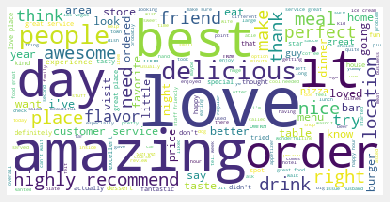

In [96]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [97]:
negative_text = ' '.join(df_neg['text'].str.lower())

In [104]:
# stopwords2 = STOPWORDS
# stopwords.add('one','got','even','lot','went','came','said','know','told','still')
extra_words = ['ve', 'like', 'got', 'one', 'just','got','even','lot','went','came','make','going','don\'t','didn\'t','right','wanted',
               'don', 'really', 'said', 'told', 'ok','know','still','place','asked','way','day','come','it','people','restaurant',
               'came','that','car','wantd','it','better','think','work','great','try','nice','let', 'went','car','guy','it','say', 'did', 'didn', 'good','want','actually','called','today','maybe','gave','year','instead','coming']
stop_words2 = text.ENGLISH_STOP_WORDS.union(extra_words)
wordcloud2 = WordCloud(stopwords=stop_words2, background_color="white", max_words=1000).generate(negative_text)

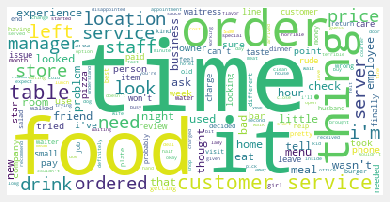

In [105]:
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()